In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
g=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [13]:
g.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
g.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [15]:
g.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019 entries, 0 to 7018
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7019 non-null   int64  
 1   Geography        7019 non-null   object 
 2   Gender           7019 non-null   object 
 3   Age              7019 non-null   int64  
 4   Tenure           7019 non-null   int64  
 5   Balance          7019 non-null   float64
 6   NumOfProducts    7019 non-null   int64  
 7   HasCrCard        7019 non-null   int64  
 8   IsActiveMember   7019 non-null   int64  
 9   EstimatedSalary  7019 non-null   float64
 10  Exited           7019 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 603.3+ KB


In [17]:
g.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7019.000000,7019,7019,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3529,3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,649.842855,NaN,NaN,38.892435,5.011683,76445.260735,1.525858,0.702949,0.511896,100585.148376,0.206155
std,97.041269,NaN,NaN,10.465306,2.887583,62415.226131,0.582843,0.456992,0.499894,57615.419008,0.404572
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,582.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51064.410000,0.000000
50%,651.000000,NaN,NaN,37.000000,5.000000,97268.100000,1.000000,1.000000,1.000000,100835.190000,0.000000
75%,717.000000,NaN,NaN,44.000000,8.000000,127537.870000,2.000000,1.000000,1.000000,149579.630000,0.000000


In [18]:
g.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

UNIVARIATE  ANALYSIS

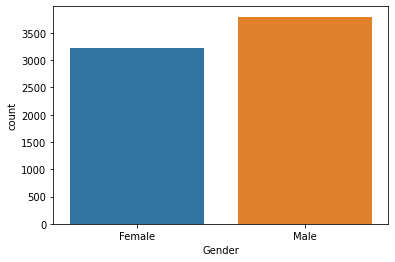

In [19]:
sns.countplot(x='Gender', data=g)
plt.show()

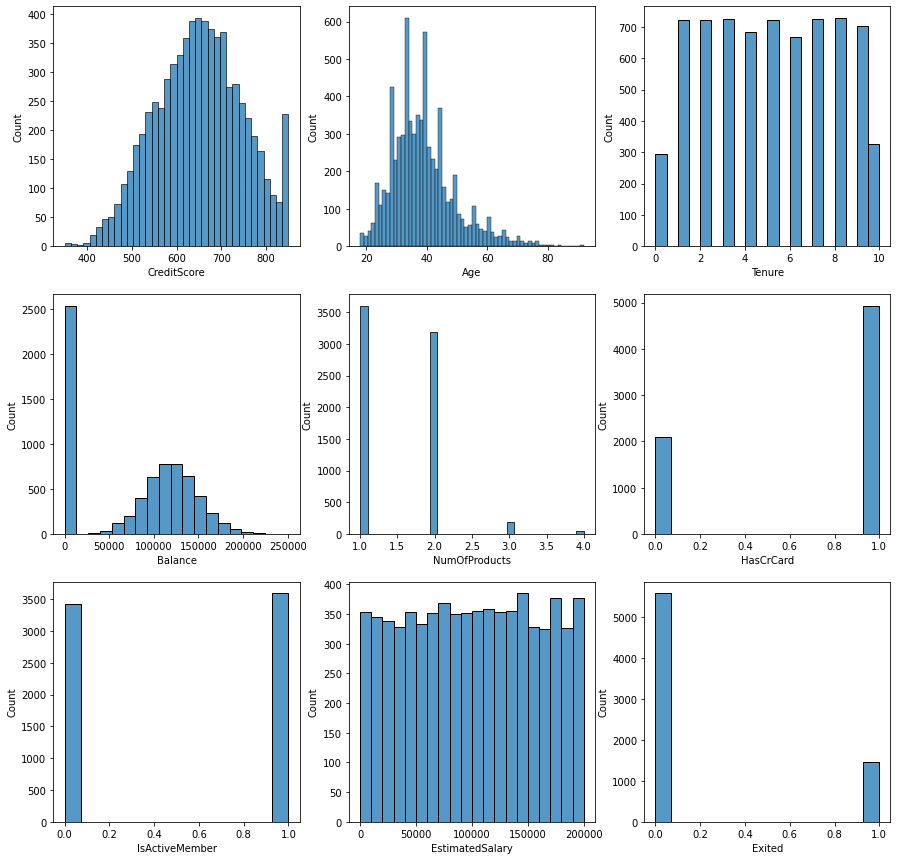

In [20]:
cols=3
rows=3
num=g.select_dtypes(exclude='object').columns
fig=plt.figure(figsize=(cols*5,rows*5))
for i, col in enumerate(num):
  ax=fig.add_subplot(rows,cols,i+1)
  sns.histplot(x=g[col],ax=ax)

BIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: y, shade. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


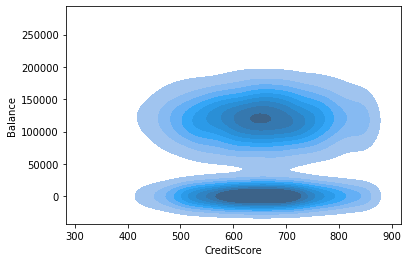

In [21]:
sns.kdeplot(g.CreditScore,g.Balance,'size',fill='True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: y, shade. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


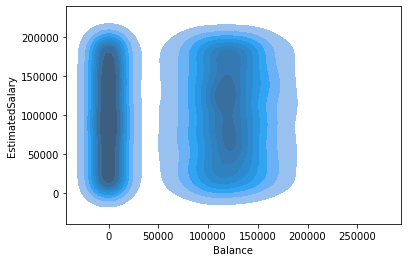

In [22]:
sns.kdeplot(g.Balance,g.EstimatedSalary,'size',fill='True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: y, shade. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


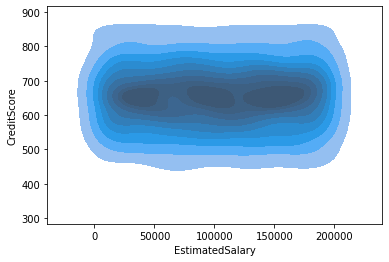

In [23]:
sns.kdeplot(g.EstimatedSalary,g.CreditScore,'size',fill='True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


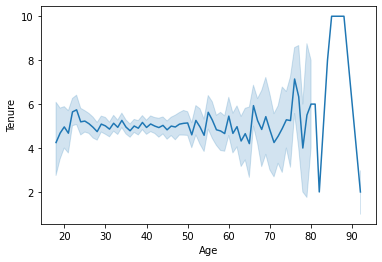

In [24]:
sns.lineplot(g.Age,g.Tenure)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


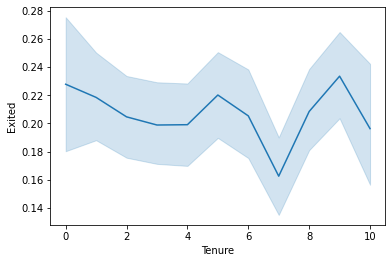

In [25]:
sns.lineplot(g.Tenure,g.Exited)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


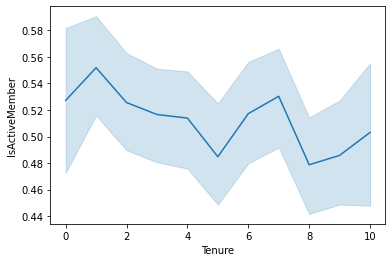

In [26]:
sns.lineplot(g.Tenure,g.IsActiveMember)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


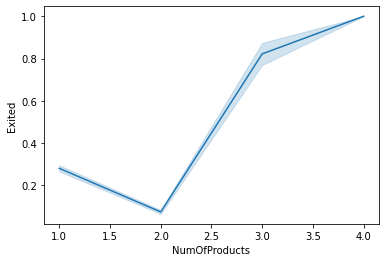

In [27]:
sns.lineplot(g.NumOfProducts,g.Exited)

MULTIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


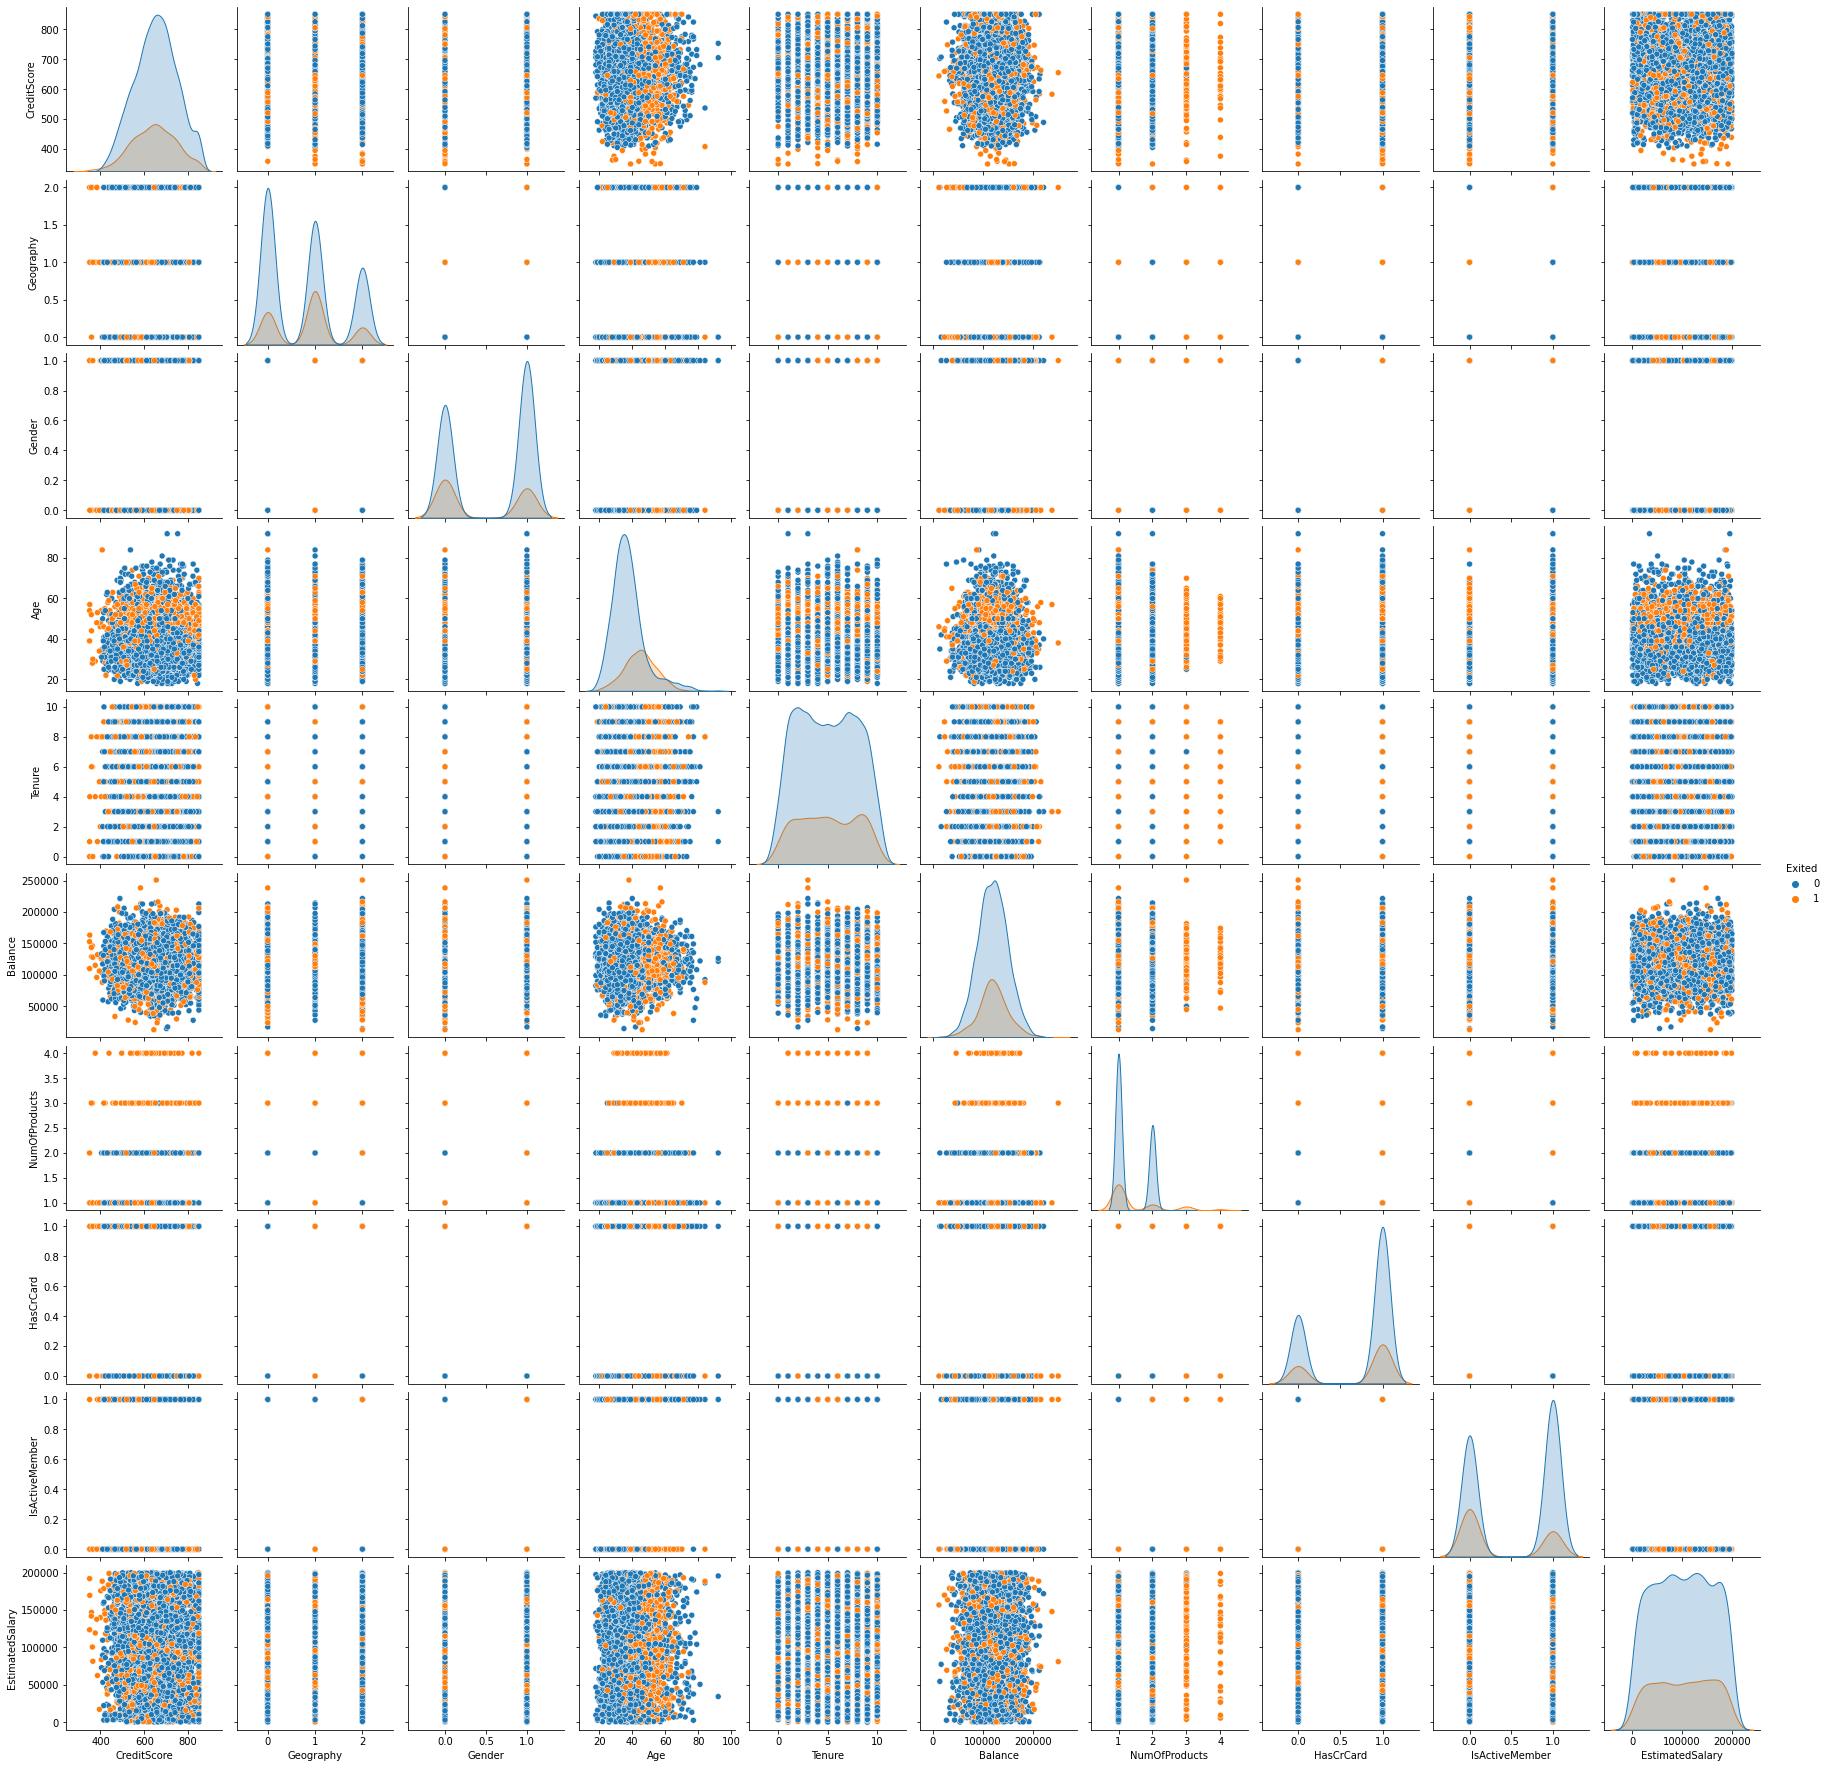

In [66]:
sns.pairplot(g,'Exited')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


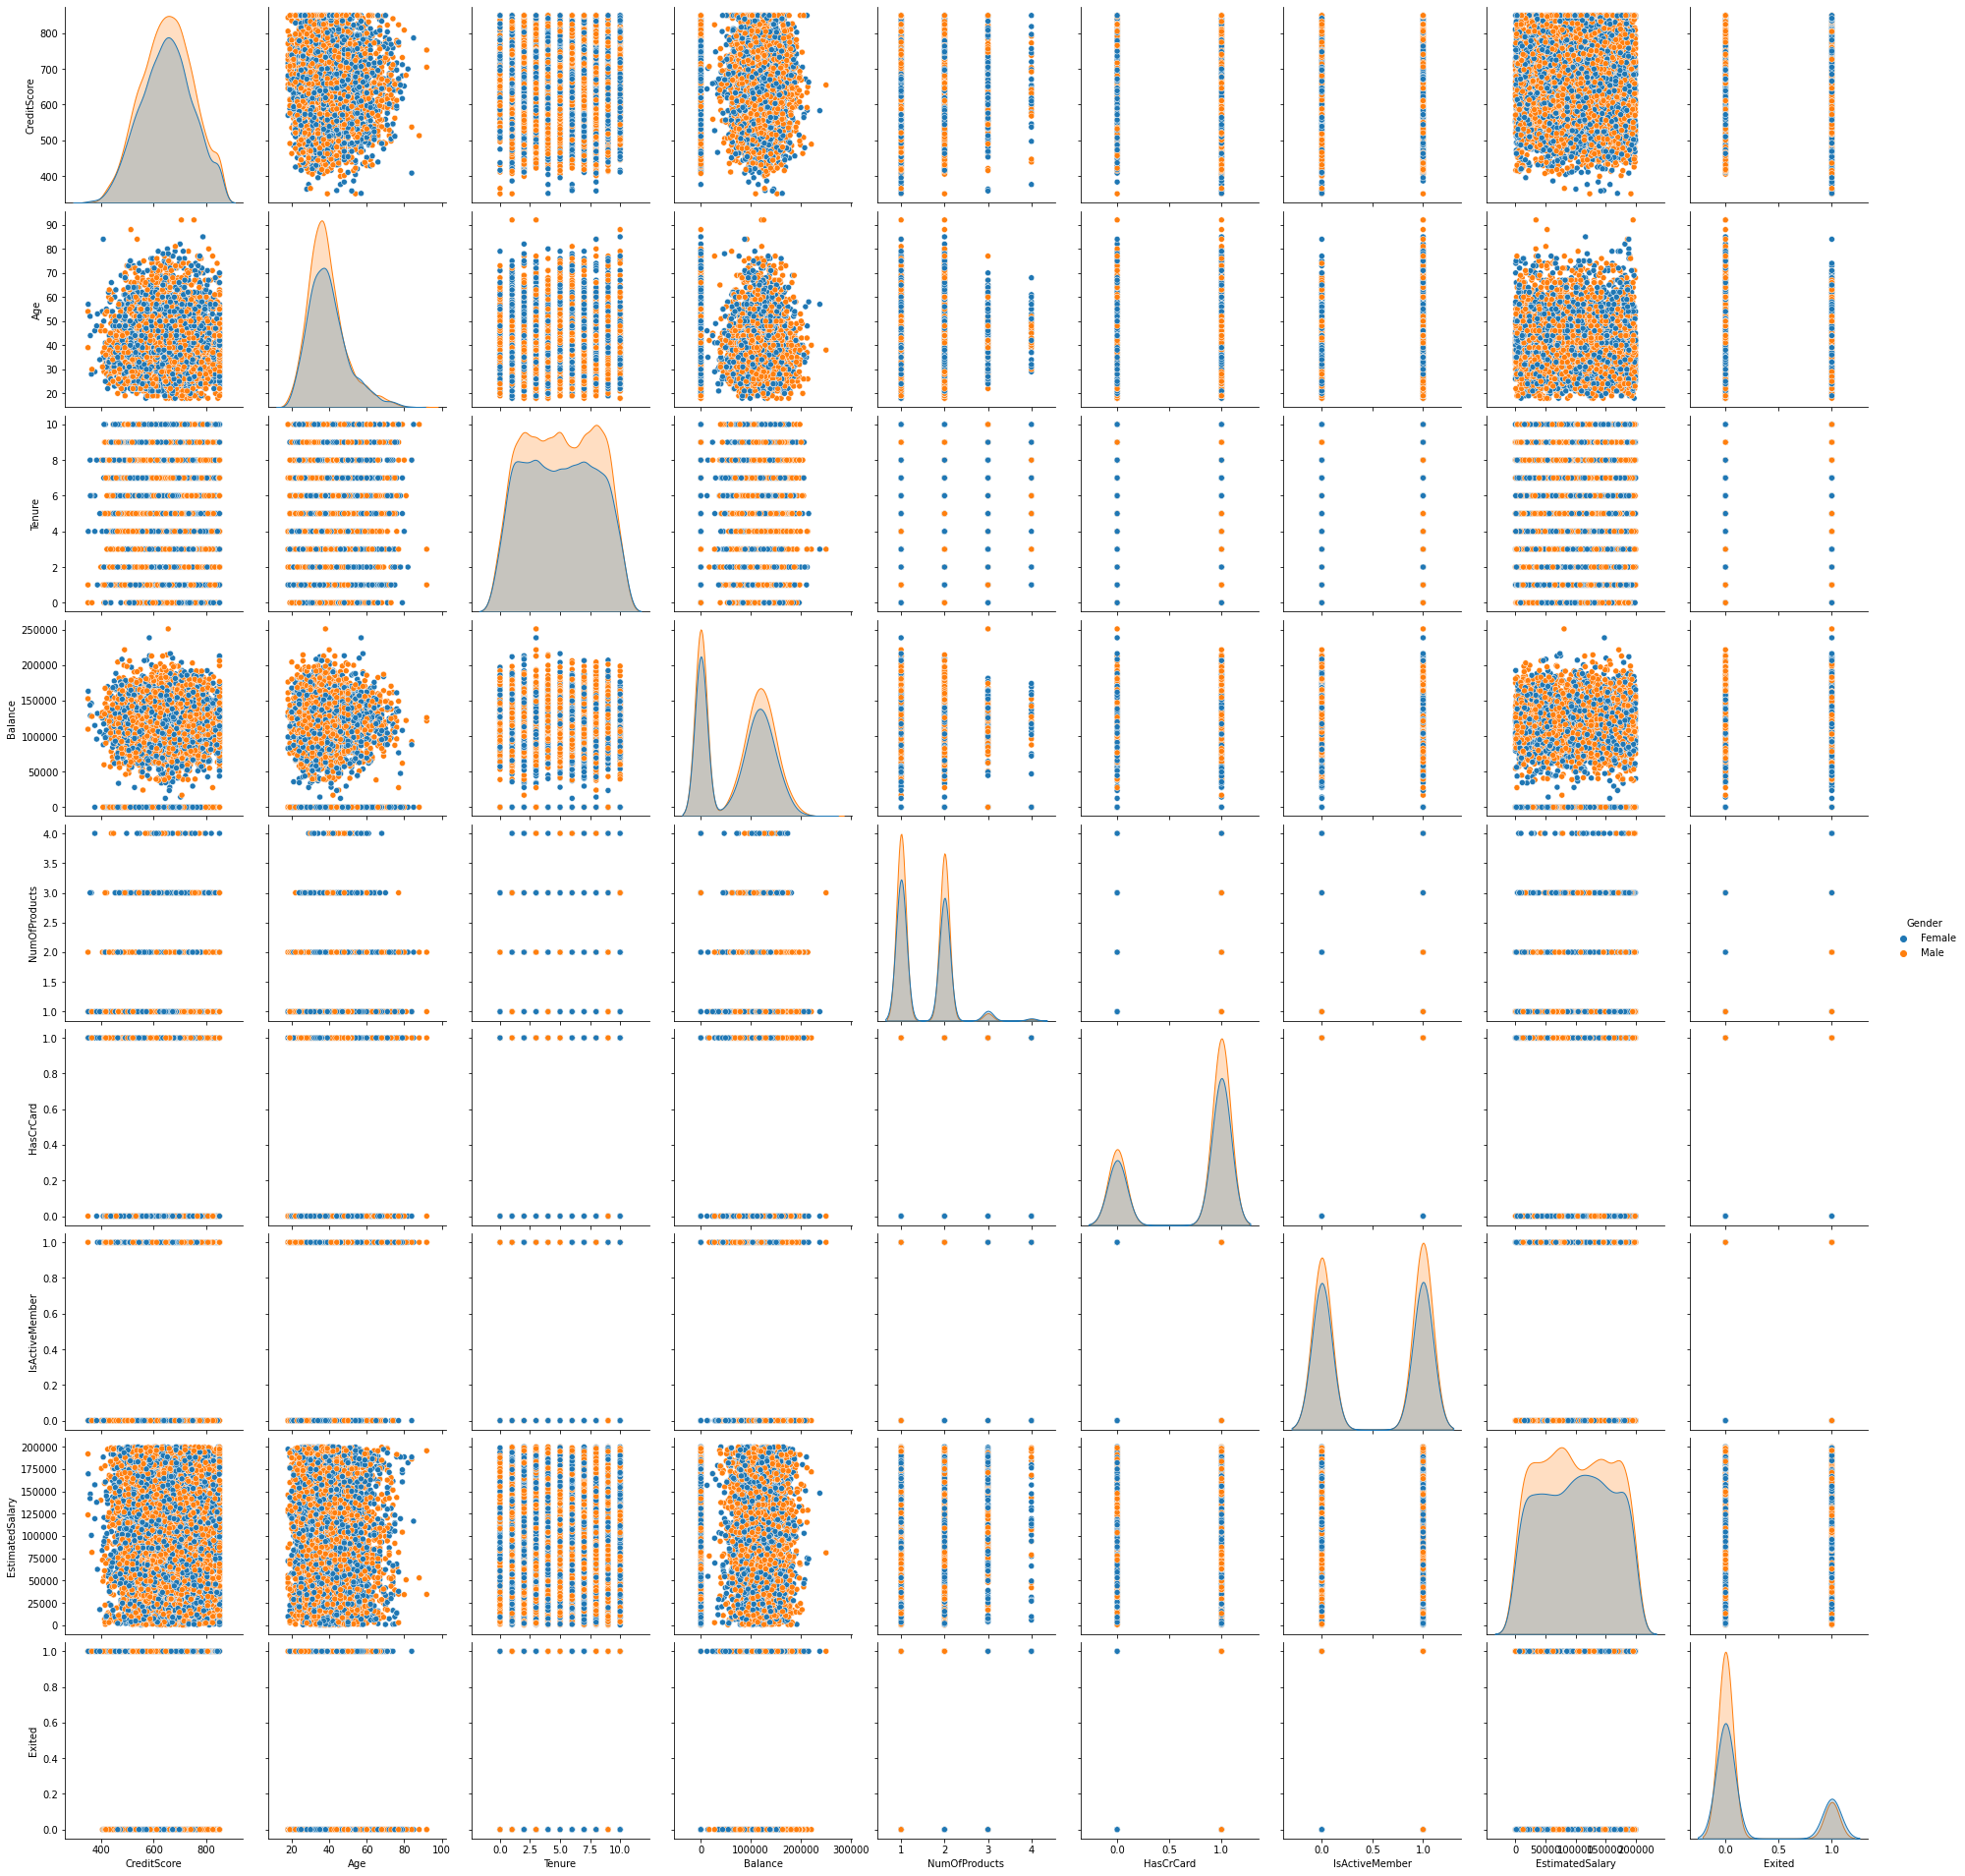

In [31]:
sns.pairplot(g,hue="Gender",size=3)

DESCRIPTIVE ANALYSIS

In [29]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019 entries, 0 to 7018
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7019 non-null   int64  
 1   Geography        7019 non-null   object 
 2   Gender           7019 non-null   object 
 3   Age              7019 non-null   int64  
 4   Tenure           7019 non-null   int64  
 5   Balance          7019 non-null   float64
 6   NumOfProducts    7019 non-null   int64  
 7   HasCrCard        7019 non-null   int64  
 8   IsActiveMember   7019 non-null   int64  
 9   EstimatedSalary  7019 non-null   float64
 10  Exited           7019 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 603.3+ KB


In [32]:
g.shape

(7019, 11)

In [33]:
g.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,7019.0,649.842855,97.041269,350.00,582.00,651.00,717.00,850.00
Age,7019.0,38.892435,10.465306,18.00,32.00,37.00,44.00,92.00
Tenure,7019.0,5.011683,2.887583,0.00,3.00,5.00,8.00,10.00
Balance,7019.0,76445.260735,62415.226131,0.00,0.00,97268.10,127537.87,250898.09
NumOfProducts,7019.0,1.525858,0.582843,1.00,1.00,1.00,2.00,4.00
HasCrCard,7019.0,0.702949,0.456992,0.00,0.00,1.00,1.00,1.00
IsActiveMember,7019.0,0.511896,0.499894,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,7019.0,100585.148376,57615.419008,11.58,51064.41,100835.19,149579.63,199992.48
Exited,7019.0,0.206155,0.404572,0.00,0.00,0.00,0.00,1.00


In [34]:
g.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


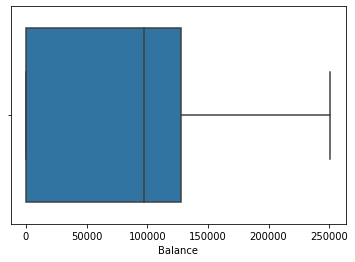

In [35]:
sns.boxplot(g['Balance'])

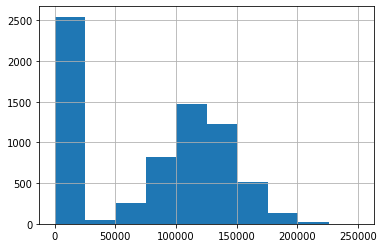

In [36]:
g['Balance'].hist()

In [37]:
index = g[(g['Balance'] == 0.0)].index
g.drop(index, inplace=True)

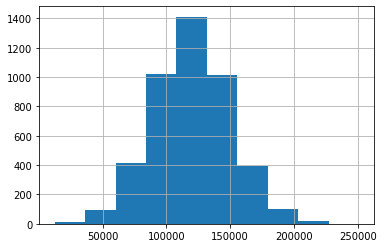

In [38]:
g['Balance'].hist()

LABEL ENCODING

In [39]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [40]:
le = LabelEncoder()

In [41]:
g['Geography'].unique()

array(['Spain', 'France', 'Germany'], dtype=object)

In [42]:
g['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [43]:
g['Geography']=le.fit_transform(g['Geography'])

In [44]:
count(g['Geography'])

Counter({2: 912, 0: 1830, 1: 1736})

In [45]:
g['Gender']=le.fit_transform(g['Gender'])

In [46]:
count(g['Gender'])

Counter({0: 2032, 1: 2446})

SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [47]:
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 1 to 7018
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      4478 non-null   int64  
 1   Geography        4478 non-null   int64  
 2   Gender           4478 non-null   int64  
 3   Age              4478 non-null   int64  
 4   Tenure           4478 non-null   int64  
 5   Balance          4478 non-null   float64
 6   NumOfProducts    4478 non-null   int64  
 7   HasCrCard        4478 non-null   int64  
 8   IsActiveMember   4478 non-null   int64  
 9   EstimatedSalary  4478 non-null   float64
 10  Exited           4478 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 419.8 KB


In [48]:
x=g.iloc[:,0:10]
y=g['Exited']

In [49]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
7,376,1,0,29,4,115046.74,4,1,0,119346.88
...,...,...,...,...,...,...,...,...,...,...
7005,751,0,1,43,1,114974.24,1,1,0,125920.54
7008,635,1,0,65,5,117325.54,1,1,0,155799.86
7016,741,2,1,50,1,78737.61,1,1,1,13018.96
7017,646,2,1,25,5,182876.88,2,1,1,42537.59


In [50]:
y

1       0
2       1
4       0
5       1
7       1
       ..
7005    0
7008    1
7016    0
7017    1
7018    1
Name: Exited, Length: 4478, dtype: int64

SPLIT DATA INTO TRAINING AND TESTING

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

SCALE THE INDEPENDENT VARIABLE

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
st = StandardScaler()

In [56]:
s_xtrain = st.fit_transform(xtrain)
s_xtrain

array([[-0.50955607,  0.27547405, -1.09653514, ...,  0.66451662,
        -1.03838785, -0.65494037],
       [ 0.67600349, -1.04663264, -1.09653514, ..., -1.50485326,
         0.96303129, -1.45800077],
       [-1.11779967, -1.04663264, -1.09653514, ...,  0.66451662,
         0.96303129, -1.04995164],
       ...,
       [-2.53016192,  0.27547405,  0.91196348, ...,  0.66451662,
         0.96303129, -0.49796994],
       [ 0.72754955, -1.04663264, -1.09653514, ...,  0.66451662,
        -1.03838785, -0.62142369],
       [-0.6848127 , -1.04663264, -1.09653514, ...,  0.66451662,
         0.96303129,  0.08769447]])

In [57]:
s_xtest = st.transform(xtest)
s_xtest

array([[-1.90129989,  0.27547405,  0.91196348, ...,  0.66451662,
        -1.03838785,  1.39989047],
       [ 1.42857607, -1.04663264,  0.91196348, ...,  0.66451662,
         0.96303129,  1.24227192],
       [ 0.75847719,  1.59758073,  0.91196348, ..., -1.50485326,
         0.96303129, -1.17446992],
       ...,
       [-0.94254304, -1.04663264, -1.09653514, ...,  0.66451662,
         0.96303129, -0.60374177],
       [-0.12811517, -1.04663264,  0.91196348, ..., -1.50485326,
         0.96303129,  0.94277565],
       [-0.94254304, -1.04663264,  0.91196348, ...,  0.66451662,
        -1.03838785,  0.33119528]])

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()
model.add(Dense(10, activation='relu')) # Input
model.add(Dense(18, activation='relu')) # 1st hid. layer
model.add(Dense(9, activation='relu')) # 2nd hid. layer
model.add(Dense(8, activation='relu')) # 3rd hid. layer
model.add(Dense(1,activation='linear')) # output layer

In [60]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [61]:
history= model.fit(s_xtrain,ytrain,batch_size=10,epochs=300)

Epoch 1/300
314/314 [==============================] - 2s 2ms/step - loss: 0.1760 - mse: 0.1760
Epoch 2/300
314/314 [==============================] - 1s 2ms/step - loss: 0.1557 - mse: 0.1557
Epoch 3/300
314/314 [==============================] - 1s 2ms/step - loss: 0.1488 - mse: 0.1488
Epoch 4/300
314/314 [==============================] - 1s 2ms/step - loss: 0.1442 - mse: 0.1442
Epoch 5/300
314/314 [==============================] - 1s 2ms/step - loss: 0.1400 - mse: 0.1400
Epoch 6/300
314/314 [==============================] - 1s 2ms/step - loss: 0.1376 - mse: 0.1376
Epoch 7/300
314/314 [==============================] - 1s 2ms/step - loss: 0.1355 - mse: 0.1355
Epoch 8/300
314/314 [==============================] - 1s 2ms/step - loss: 0.1332 - mse: 0.1332
Epoch 9/300
314/314 [==============================] - 1s 2ms/step - loss: 0.1308 - mse: 0.1308
Epoch 10/300
314/314 [==============================] - 1s 2ms/step - loss: 0.1292 - mse: 0.1292
Epoch 11/300
314/314 [=================

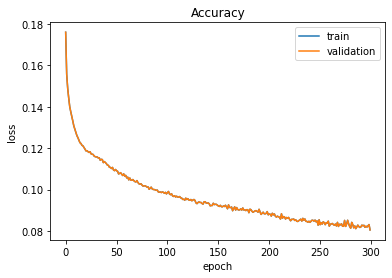

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.title('Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()